<a href="https://colab.research.google.com/github/chldbwls/cv_2025/blob/main/CV_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PyTorch 설치 여부 확인
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 9.91M/9.91M [00:00<00:00, 94.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 38.0MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 38.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.36MB/s]


Epoch [1/50], Loss: 0.0133, Validation Accuracy: 95.18%
Epoch [2/50], Loss: 0.0055, Validation Accuracy: 97.01%
Epoch [3/50], Loss: 0.0039, Validation Accuracy: 97.17%
Epoch [4/50], Loss: 0.0030, Validation Accuracy: 97.55%
Epoch [5/50], Loss: 0.0024, Validation Accuracy: 97.67%
Epoch [6/50], Loss: 0.0020, Validation Accuracy: 97.75%
Epoch [7/50], Loss: 0.0017, Validation Accuracy: 97.83%
Epoch [8/50], Loss: 0.0015, Validation Accuracy: 98.03%
Epoch [9/50], Loss: 0.0015, Validation Accuracy: 97.73%
Epoch [10/50], Loss: 0.0013, Validation Accuracy: 98.22%
Epoch [11/50], Loss: 0.0011, Validation Accuracy: 98.13%
Epoch [12/50], Loss: 0.0012, Validation Accuracy: 97.88%
Epoch [13/50], Loss: 0.0010, Validation Accuracy: 97.92%
Epoch [14/50], Loss: 0.0009, Validation Accuracy: 97.99%
Epoch [15/50], Loss: 0.0010, Validation Accuracy: 98.30%
Epoch [16/50], Loss: 0.0009, Validation Accuracy: 97.90%
Epoch [17/50], Loss: 0.0008, Validation Accuracy: 97.50%
Epoch [18/50], Loss: 0.0008, Validation 

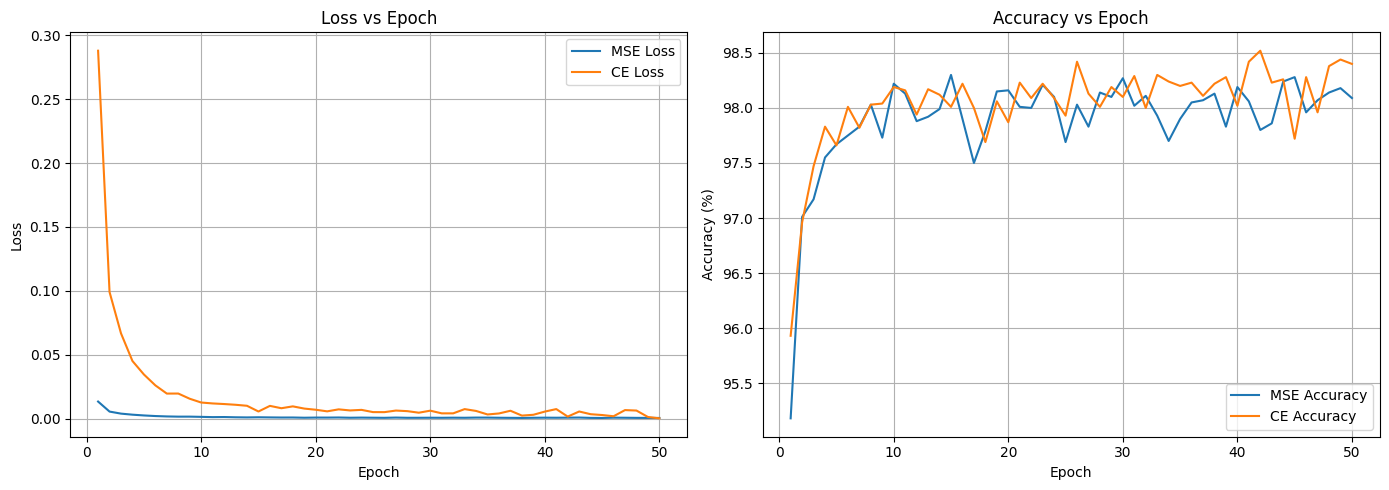

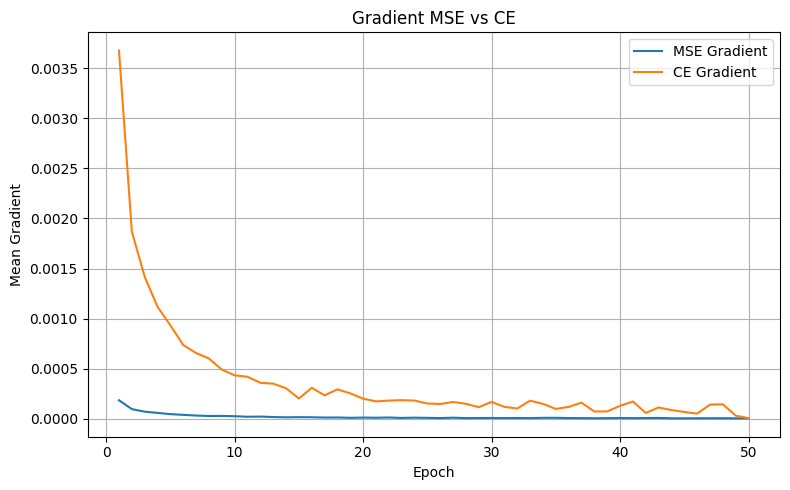

In [1]:
import torch  #PyTorch핵심 패키지
import torch.nn as nn  #신경망 모델의 구조와 층을 정의
import torch.optim as optim  #최적화 관련
import torchvision.datasets as dsets   #표준 이미지 데이터셋
import torchvision.transforms as transforms  #전처리 및 변환하는 기능
from torch.utils.data import DataLoader     #데이터를 미니배치로 나누고 셔플링
import matplotlib.pyplot as plt  #시각화
import numpy as np

# 하이퍼파라미터
input_size = 784      # MNIST-28*28
hidden_size = 512     # 은닉층의 노드 수
num_classes = 10      # 숫자 클래스 (0~9)
num_epochs = 50       # 학습 횟수
batch_size = 128      # 한 번에 처리하는 데이터 개수
learning_rate = 0.001 # 학습률 (너무 크면 발산, 너무 작으면 느린 학습)


# MNIST 데이터셋
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True) #이미지를 PyTorch가 처리 가능한 Tensor로
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# 데이터 로더 정의
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 모델 정의 - 교수님께서 올려주신 참고자료를 보고 모델을 정의했습니다.
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 입력층→ 첫번째 은닉층
        self.relu1 = nn.ReLU()                             # 활성화 함수
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)    # 두번째 은닉층
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size//2, num_classes)  # 출력층

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)   # softmax 없이 raw logits 반환 : PyTorch에서는 출력층에서 Softmax 함수를 직접 적용하지 않고,손실 함수로 CrossEntropyLoss 를 사용할 때 내부적으로 Softmax 연산을 포함해서 처리함.
        out = self.relu2(out)
        out = self.fc3(out)
        return out

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 손실함수 - MSE
def mse_loss():
  criterion=nn.MSELoss()
  # 옵티마이저는 Adam을 사용하도록 합니다.
  optimizer=optim.Adam(model.parameters(), lr=learning_rate)

  train_losses_mse=[]   # 에폭별 훈련 손실 저장 리스트
  test_accuracies_mse=[]   # 에폭별 테스트 정확도 저장 리스트
  gradients_per_epoch = [] # 에폭별 기울기를 저장하는 리스트
  accuracy=0  # 최종 정확도

  for epoch in range(num_epochs):
    model.train()  #학습 모드
    total_loss=0
    epoch_grads = [] # 에폭 기울기를 저장

    for images, labels in train_loader:   # 훈련 데이터를 미니배치 단위로 가져와서 학습시킬 예정입니다
      # 입력이미지를 28x28을 1D 벡터로 펼치기
      images=images.reshape(-1,28*28).to(device)
      labels=labels.to(device)

      outputs=model(images)
      outputs=torch.softmax(outputs,dim=1)    # mse는 softmax를 적용하여 확률로 변환
      one_hot=torch.zeros_like(outputs).scatter_(1,labels.unsqueeze(1),1.0) # 정답을 one-hot 인코딩으로 변환

      loss=criterion(outputs, one_hot)  # MSE 계산합니다
      optimizer.zero_grad()   # 이전 기울기 초기화합니다
      loss.backward()   # 역전파를 수행합니다
      for name, param in model.named_parameters():
        if "weight" in name and param.grad is not None: # 기울기가 존재하면
          epoch_grads.append(param.grad.detach().abs().mean().item())  #기울기를 분리해서 절댓값의 평균을 구해서 저장
      optimizer.step()   # 파라미터 업데이트를 위해 사용합니다
      total_loss+=loss.item()  # 평균 손실을 계산하기 위하여 현재 배치의 손실을 누적하여 저장합니다

    avg_loss=total_loss/len(train_loader)     # 위에 구했던 누적 손실 값을 사용하여 epoch 평균 손실을 계산합니다.
    train_losses_mse.append(avg_loss)   # 저장
    gradients_per_epoch.append(np.mean(epoch_grads)) # 기ㅜ울기 저장
    model.eval()  # 평가 모드
    correct=0
    total=0
    with torch.no_grad():  #테스트셋에서는 기울기는 따로 계산하지 않고
      for images, labels in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        outputs=model(images)  #예측을 수행합니다
        outputs=torch.softmax(outputs,dim=1)  #위와 동일하게 softmax를 적용하고
        _, predicted=torch.max(outputs.data, 1) #가장 확률이 높게 나오는 클래스를 예측값으로 지정합니다.
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()

    accuracy=100*correct/total  # 정확도를 계산합니다
    test_accuracies_mse.append(accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')  # 자료에 있던 것처럼 얼마나 진행됐는지 확인하기 위해 진행상황을 print합니다
  print(f'최종 테스트 정확률: {accuracy:.2f}%')
  return train_losses_mse, test_accuracies_mse, gradients_per_epoch

# Cross Entropy를 손실함수로 사용합니다
def ce_loss():
  criterion=nn.CrossEntropyLoss()
  optimizer=optim.Adam(model.parameters(), lr=learning_rate)

  train_losses_ce=[]
  test_accuracies_ce=[]
  gradients_per_epoch = []
  accuracy=0

  for epoch in range(num_epochs):
    model.train()
    total_loss=0
    epoch_grads = []
    for images, labels in train_loader:
      images=images.reshape(-1,28*28).to(device)
      labels=labels.to(device)

      # MSE는 softmax를 사용했는데, CE는 사용하지 않습니다.
      # 그 외에는 위에 MSE와 동일하게 진행합니다.
      outputs=model(images)
      loss=criterion(outputs,labels)
      optimizer.zero_grad()
      loss.backward()
      for name, param in model.named_parameters():
        if "weight" in name and param.grad is not None:
          epoch_grads.append(param.grad.detach().abs().mean().item())
      optimizer.step()
      total_loss+=loss.item()

    avg_loss=total_loss/len(train_loader)
    train_losses_ce.append(avg_loss)
    gradients_per_epoch.append(np.mean(epoch_grads))
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
      for images, labels in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        outputs=model(images)
        _, predicted=torch.max(outputs.data, 1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()

    accuracy=100*correct/total
    test_accuracies_ce.append(accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
  print(f'최종 테스트 정확률: {accuracy:.2f}%')
  return train_losses_ce, test_accuracies_ce, gradients_per_epoch

# 손실함수와 정확도를 시각화 합니다
def visualize_loss_acc(loss_mse, loss_ce, acc_mse, acc_ce):
  epochs = range(1, num_epochs+1)
  plt.figure(figsize=(14,5))
  # 손실함수 그래프
  plt.subplot(1,2,1)
  plt.plot(epochs, loss_mse, label='MSE Loss')  # MSE loss 함수
  plt.plot(epochs, loss_ce, label='CE Loss')  # CE loss 함수
  plt.xlabel('Epoch')   # x축은 Epoch
  plt.ylabel('Loss')  # y축은 Loss 값
  plt.title('Loss vs Epoch')
  plt.legend()
  plt.grid(True)

  # 정확도 그래프
  plt.subplot(1,2,2)
  plt.plot(epochs, acc_mse, label='MSE Accuracy')  # MSE 정확도
  plt.plot(epochs, acc_ce, label='CE Accuracy')  # CE 정확도
  plt.xlabel('Epoch')  # x축은 epoch
  plt.ylabel('Accuracy (%)')  # 정확도
  plt.title('Accuracy vs Epoch')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

# 기울기 변화를 시각화 하는 함수
def grad_vis(grad_mse, grad_ce):
    epochs = range(1, len(grad_mse) + 1) # epoch 수 설정
    plt.figure(figsize=(8,5))
    plt.plot(epochs, grad_mse, label="MSE Gradient") # MSE에서 발생한 기울기의 평균
    plt.plot(epochs, grad_ce, label="CE Gradient") # CE에서 발생한 기울기에 평균
    plt.xlabel("Epoch")
    plt.ylabel("Mean Gradient")
    plt.title("Gradient MSE vs CE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() # 출력


# 실행 코드
model=MLP(input_size, hidden_size, num_classes).to(device)  # MSE로 훈련할 모델 정의
train_loss_mse, test_acc_mse, gra_mse = mse_loss()  # 모델 학습

model=MLP(input_size, hidden_size, num_classes).to(device)  # CE로 훈련할 모델 정의
train_loss_ce, test_acc_ce, grad_ce =ce_loss()  # 모델 학습

# 시각화
visualize_loss_acc(train_loss_mse, train_loss_ce, test_acc_mse, test_acc_ce)  #손실값이랑 정확도 그래프 그리는 함수 호출
grad_vis(gra_mse, grad_ce) # 기울기 확인하는 그래프 그리는 함수 호출


[ReLU] Epoch 1/300 - Loss: 0.6925, Accuracy:83.00%
[ReLU] Epoch 2/300 - Loss: 0.6796, Accuracy:82.50%
[ReLU] Epoch 3/300 - Loss: 0.6171, Accuracy:83.00%
[ReLU] Epoch 4/300 - Loss: 0.4894, Accuracy:83.00%
[ReLU] Epoch 5/300 - Loss: 0.3683, Accuracy:84.50%
[ReLU] Epoch 6/300 - Loss: 0.3186, Accuracy:86.00%
[ReLU] Epoch 7/300 - Loss: 0.3040, Accuracy:85.00%
[ReLU] Epoch 8/300 - Loss: 0.2986, Accuracy:85.50%
[ReLU] Epoch 9/300 - Loss: 0.2967, Accuracy:86.00%
[ReLU] Epoch 10/300 - Loss: 0.2966, Accuracy:86.00%
[ReLU] Epoch 11/300 - Loss: 0.2968, Accuracy:85.50%
[ReLU] Epoch 12/300 - Loss: 0.2960, Accuracy:86.00%
[ReLU] Epoch 13/300 - Loss: 0.2949, Accuracy:86.00%
[ReLU] Epoch 14/300 - Loss: 0.2954, Accuracy:86.50%
[ReLU] Epoch 15/300 - Loss: 0.2944, Accuracy:87.00%
[ReLU] Epoch 16/300 - Loss: 0.2970, Accuracy:85.00%
[ReLU] Epoch 17/300 - Loss: 0.2933, Accuracy:86.50%
[ReLU] Epoch 18/300 - Loss: 0.2924, Accuracy:85.50%
[ReLU] Epoch 19/300 - Loss: 0.2918, Accuracy:85.00%
[ReLU] Epoch 20/300 -

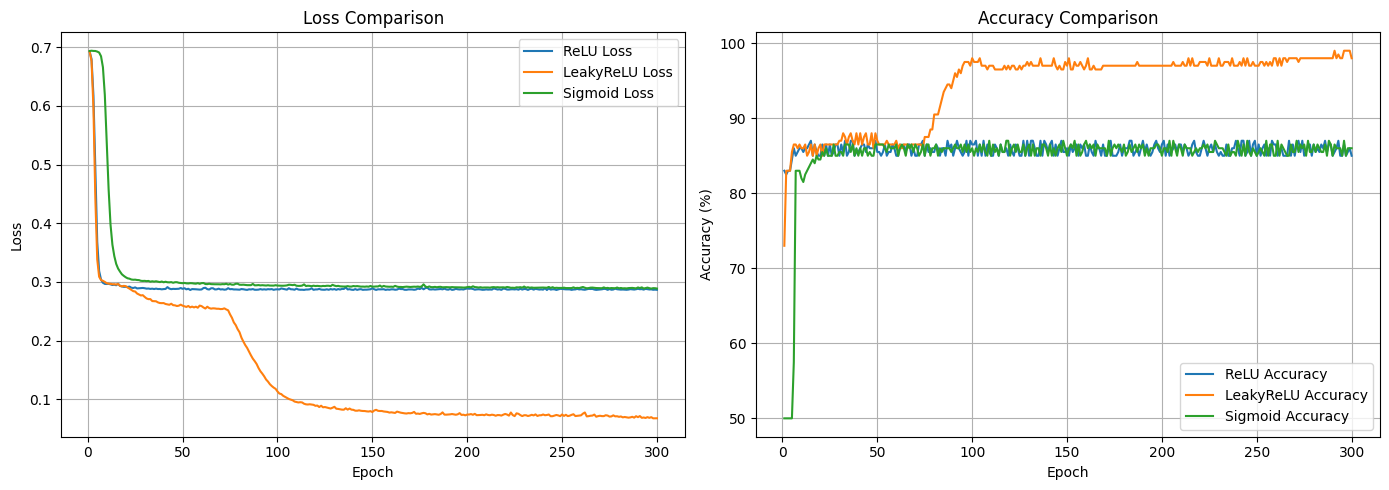

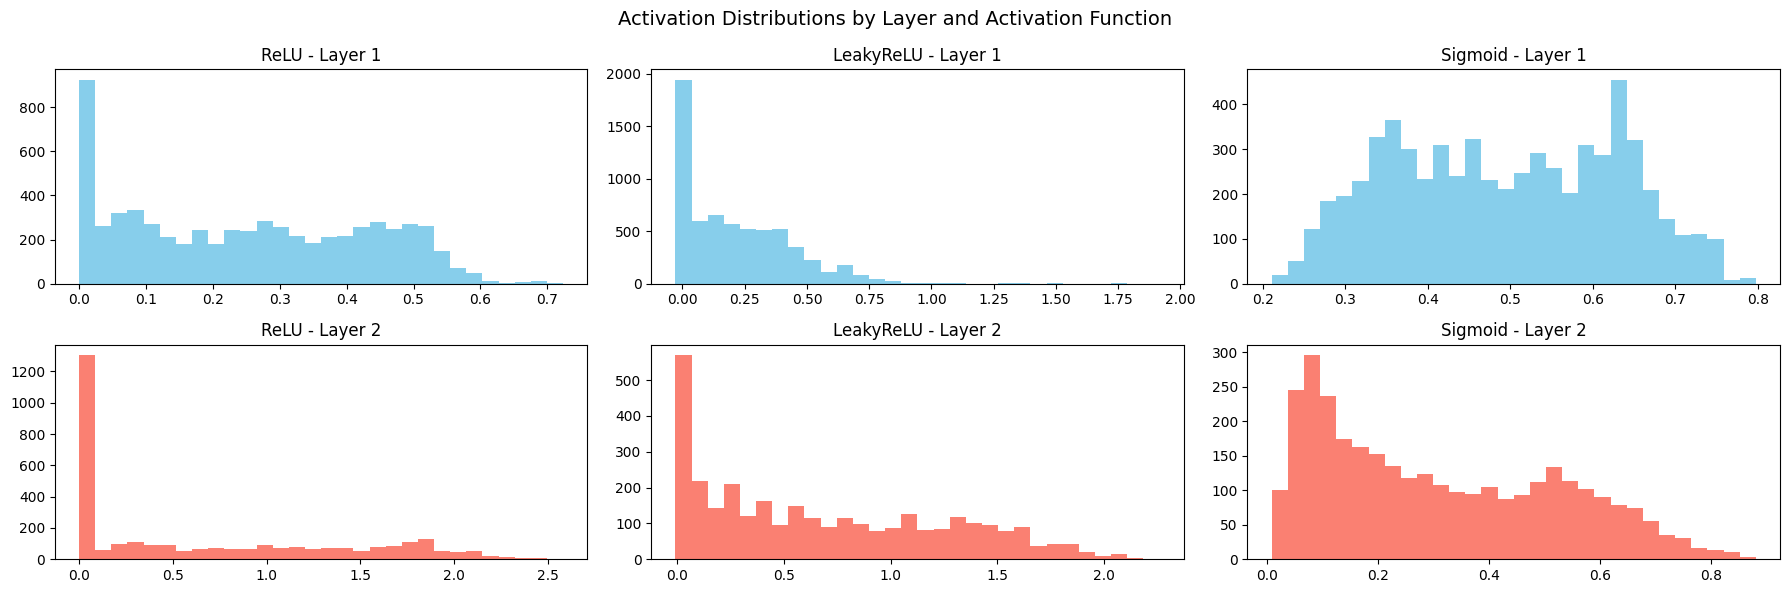

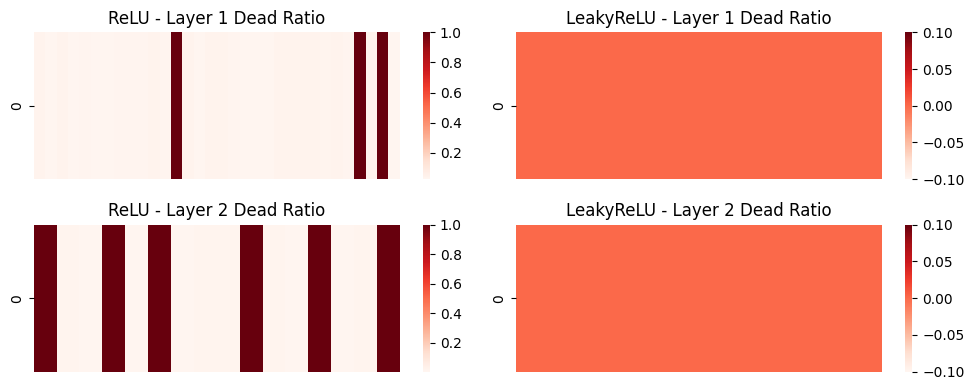

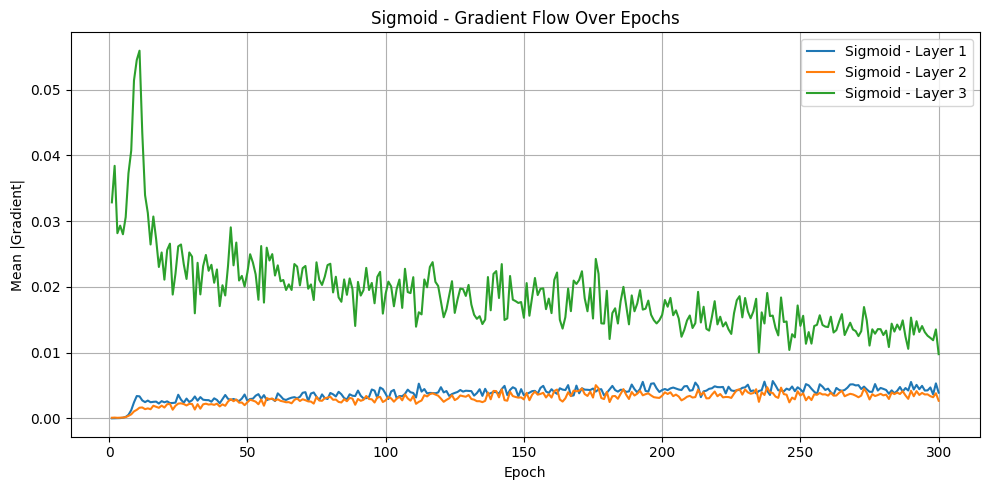

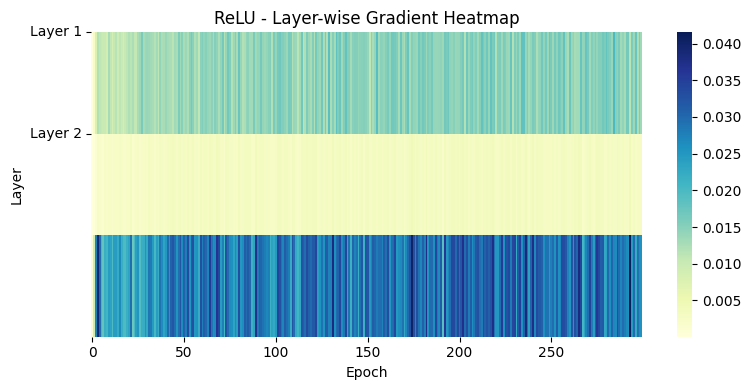

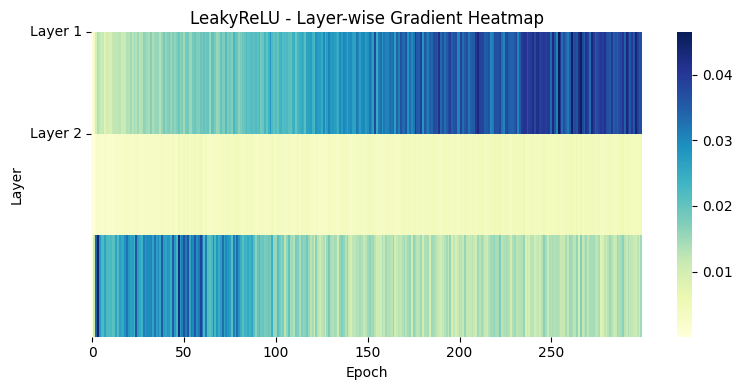

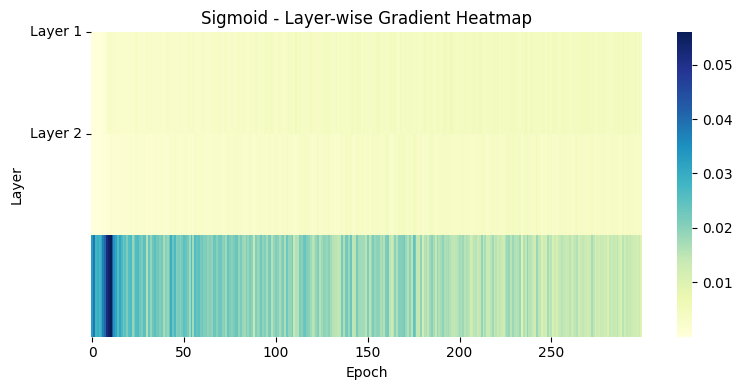

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 하이퍼파라미터
input_size = 2 # 2차원이라서
hidden_size = 32 # 첫번쨰 은닉층 수
num_classes = 2 # 이진 분류
num_epochs = 300      # 학습 횟수 - 추천 200-500이라 300으로 설정하고 실행
batch_size = 32 # 배치 사이즈
learning_rate = 0.001 # Adam을 사용할거라서 추천 학습률 중 하나로 선택

# 데이터 생성 후 전처리 과정 진행
x,y =make_moons(n_samples=1000, noise=0.2, random_state=42) # 2차원 분류 데이터
x=StandardScaler().fit_transform(x) # 정규화

# 각각 텐서로 변환하는 과정을 거짐
x=torch.tensor(x, dtype=torch.float32)
y=torch.tensor(y, dtype=torch.long)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42) # 학습/테스트 데이터셋으로 분할


train_dataset=torch.utils.data.TensorDataset(x_train, y_train) #학습용 데이터셋
test_dataset=torch.utils.data.TensorDataset(x_test, y_test) #테스트용 데이터셋
train_loader=torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # 학습용
test_loader=torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # 테스트용

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU, CPU 사용 설정 (안하면 오류 뜸)

# 가중치 초기화
def init_weight(m):
  if isinstance(m, nn.Linear):
    nn.init.normal_(m.weight, mean=0.0, std=0.01)  # 가중치를 평균 0, 표준편차 0.01린 정규 분포로 초기화
    if m.bias is not None:  # 편향이 존재하면 0으로 초기화
      nn.init.constant_(m.bias,0.0)

# 참고자료대로 모델 정의
def make_model(activation_function):
  model = nn.Sequential(
    nn.Linear(input_size, hidden_size),   # 입력 → 첫 번째 은닉층 (input_size → 256)
    activation_function,            # 활성화 함수
    nn.Linear(hidden_size, hidden_size//2),              # 두 번째 은닉층 (256 → 128)
    activation_function,                              # 활성화 함수
    nn.Linear(hidden_size//2, num_classes)   # 출력층 (128 → 클래스 개수)
  )
  model.apply(init_weight) # 가중치 설정
  return model.to(device)

# 모델 학습 함수
def train(activation_function, act_name, num_epochs=300, learning_rate=0.001):
  # 지정된 활성화 함수로 모델을 초기화 함
  model=make_model(activation_function)
  # 손실함수는 CE를 공통적으로 사용
  criterion=nn.CrossEntropyLoss()
  # 옵티마이저는 Adam을 공통으로 사용
  optimizer=optim.Adam(model.parameters(), lr=learning_rate)

  train_loss=[]    # 에폭별 손실값
  test_acc=[]  # 에폭별 정확도
  activation_output=[]  # 활성화 값
  gradients_per_epoch = []  # 기울기 저장용

  for epoch in range(num_epochs):
    model.train()  # 학습 모드로 전환
    total_loss=0
    gradients_this_epoch=[]  # 이번 epoch의 기울기의 평균을 저장하는 리스트

    # 미니배치로 나누어서 학습 진행
    for x_batch, y_batch in train_loader:
      x_batch, y_batch=x_batch.to(device),y_batch.to(device)
      outputs=model(x_batch)  # 순전파
      loss=criterion(outputs, y_batch)  # 손실값 계산
      optimizer.zero_grad()  # 기울기 초기화
      loss.backward()  # 역전파로 기울기 계산
      grads = []  # 각 레이어의 가중치 기울기의 평균값을 저장하는 리스트
      for name, param in model.named_parameters():
        if "weight" in name and param.grad is not None:
            grads.append(param.grad.detach().abs().mean().item())

      gradients_this_epoch.append(grads)  # 해당 배치의 기울기 평균을 저장한다

      optimizer.step()  # 파라미터 업데이트
      total_loss += loss.item() # 손실값을 누적함

    avg_loss=total_loss/len(train_loader)  # 손실 평균
    avg_gradients = np.mean(gradients_this_epoch, axis=0).tolist()  # 기울기 평균
    # 각 값들 저장
    train_loss.append(avg_loss)
    gradients_per_epoch.append(avg_gradients)

    model.eval() # 평가 모드
    correct=0
    total=0
    activation_sample=None

    # 평가할 떄는 기울기는 생각하지 않음
    with torch.no_grad():
      for x_batch, y_batch in test_loader:
        x_batch, y_batch=x_batch.to(device),y_batch.to(device)
        # 계층 별로 중간 활성화 값을 계산하기 위하여
        x1=model[0](x_batch)
        a1=model[1](x1) # 활성화 함수 1
        x2=model[2](a1)
        a2=model[3](x2)  # 활성화 함수 2
        x3=model[4](a2)  # 출력층

        # 초기화
        if activation_sample is None:
          activation_sample = (a1.detach().cpu().numpy(), a2.detach().cpu().numpy())# 첫 은닉층 출력 저장, 두번째 은닉층 출력 저장
        else:
          activation_sample = (
            np.concatenate((activation_sample[0], a1.detach().cpu().numpy()), axis=0),
            np.concatenate((activation_sample[1], a2.detach().cpu().numpy()), axis=0)
          )


        outputs=model(x_batch)
        _, predicted=torch.max(outputs.data,1)  #예측값 계산
        total+=y_batch.size(0)
        correct+=(predicted==y_batch).sum().item()

      acc=100*correct/total  # 정확도 구하기
      test_acc.append(acc)
      activation_output.append(activation_sample)  #에폭별 중간 계층 활성화 저장
      # 학습 진행도를 파악하기 위하여 참고자료처럼 print를 해줌
      print(f"[{act_name}] Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}, Accuracy:{acc:.2f}%")

  return model, train_loss, test_acc, activation_output, gradients_per_epoch

# 실험 A의 시각화와 동일하게 출력함
def compare_loss_accuracy(loss_list, acc_list, labels):

    epochs = range(1, len(loss_list[0]) + 1)

    plt.figure(figsize=(14, 5))

    # 손실 함수 비교
    plt.subplot(1, 2, 1)
    for loss, label in zip(loss_list, labels): # 3개의 선을 출력합니다 (ReLU, 시그모이드, LeakyReLU)
        plt.plot(epochs, loss, label=f"{label} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Comparison")
    plt.legend()
    plt.grid(True)

    # 정확도 비교
    plt.subplot(1, 2, 2)
    for acc, label in zip(acc_list, labels): # 위와 동일하게 3개의 선을 출력합니다
        plt.plot(epochs, acc, label=f"{label} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Comparison")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# 각 활성화 함수별로 각각의 계층의 활성화 분포를 비교하는 함수입니다
def compare_activation_histograms(act_relu, act_lrelu, act_sigmoid):


    # 각각의 활성화 함수에 해당하는계층의 출력값
    activations = {
        "ReLU": act_relu,
        "LeakyReLU": act_lrelu,
        "Sigmoid": act_sigmoid
    }

    plt.figure(figsize=(18, 6))
    for i, (name, (a1, a2)) in enumerate(activations.items()): # 활성화 함수 개별에 대하여
        plt.subplot(2, 3, i + 1) # 위에는 계층 1에 대한 그래프를,
        plt.hist(a1.flatten(), bins=30, color='skyblue')
        plt.title(f"{name} - Layer 1")

        plt.subplot(2, 3, i + 4) # 바로 아래쪽에는 계층 2에 대한 그래프를 출력하도록 구성합니다
        plt.hist(a2.flatten(), bins=30, color='salmon')
        plt.title(f"{name} - Layer 2")

    plt.suptitle("Activation Distributions by Layer and Activation Function", fontsize=14)
    plt.tight_layout()
    plt.show()

# ReLU 계열 활성화함수에서 죽은 뉴런의 비율을 그래프로 표현 (히트맵 그래프)
def compare_dead_relu_heatmaps(act_relu, act_lrelu):
    import seaborn as sns
    import matplotlib.pyplot as plt
    # 특정 계층에서 0으로 죽어있는 뉴런에 대한 비율을 계산합니다
    def dead_ratio(act):
        a1, a2 = act
        return (
            (a1 == 0).sum(axis=0) / a1.shape[0], # 1계층
            (a2 == 0).sum(axis=0) / a2.shape[0] # 2계층
        )

    d_relu = dead_ratio(act_relu) # ReLU의 죽은 뉴런
    d_lrelu = dead_ratio(act_lrelu) # LeakyReLU의 죽은 ㄱ뉴런

    ratios = [d_relu, d_lrelu]
    names = ["ReLU", "LeakyReLU"]

    plt.figure(figsize=(10, 4))
    for i, (layer1, layer2) in enumerate(ratios): # 활성화 함수별로 (ReLU, LeakyReLU)
        plt.subplot(2, 2, i + 1)
        # Layer 1에서 죽은 뉴런 비율을,
        sns.heatmap([layer1], cmap="Reds", cbar=True, xticklabels=False)
        plt.title(f"{names[i]} - Layer 1 Dead Ratio")

        plt.subplot(2, 2, i + 3)
        # Layer 2에서 죽은 뉴런의 비율을 그래프로 출력합니다(히트맵 그래프 형식으로 출력)
        sns.heatmap([layer2], cmap="Reds", cbar=True, xticklabels=False)
        plt.title(f"{names[i]} - Layer 2 Dead Ratio")

    plt.tight_layout()
    plt.show()

# epoch 별로 층별 평균 기울기 시각화 함수 - 해당 함수는 시그모이드를 위하여 만들었습니다
def plot_gradient_flow_over_epochs(gradient_list, label):
    import matplotlib.pyplot as plt
    gradient_array = np.array(gradient_list)
    epochs = np.arange(1, gradient_array.shape[0] + 1)
    # 각 레이어에 대하여
    plt.figure(figsize=(10, 5))
    for i in range(gradient_array.shape[1]):
        plt.plot(epochs, gradient_array[:, i], label=f"{label} - Layer {i+1}") # Layer 별로 기울기의 흐름을 그래프로 시각화 합니다

    plt.xlabel("Epoch")
    plt.ylabel("Mean |Gradient|")
    plt.title(f"{label} - Gradient Flow Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Layer별 Gradient 히트맵 시각화
def plot_gradient_heatmap(gradient_list, title):
    import seaborn as sns
    import matplotlib.pyplot as plt

    grad_array = np.array(gradient_list)  # shape: (epochs, layers)

    plt.figure(figsize=(8, 4))
    sns.heatmap(grad_array.T, cmap="YlGnBu", cbar=True, xticklabels=50)
    plt.xlabel("Epoch")
    plt.ylabel("Layer")
    plt.title(title)
    plt.yticks([0, 1], ["Layer 1", "Layer 2"], rotation=0)
    plt.tight_layout()
    plt.show()



# 학습 후 반환된 activation_output 리스트 중 마지막 결과 사용
# 각 활성화 함수 학습 실행
model_relu, loss_relu, acc_relu, act_relu, gradients_relu = train(nn.ReLU(), "ReLU")
model_lrelu, loss_lrelu, acc_lrelu, act_lrelu,gradients_lrelu = train(nn.LeakyReLU(0.01), "LeakyReLU")
model_sigmoid, loss_sigmoid, acc_sigmoid, act_sigmoid,gradients_sigmoid = train(nn.Sigmoid(), "Sigmoid")

# 비교 시각화 실행 - 손실이랑 정확도에 대하여
compare_loss_accuracy(
    [loss_relu, loss_lrelu, loss_sigmoid],
    [acc_relu, acc_lrelu, acc_sigmoid],
    ["ReLU", "LeakyReLU", "Sigmoid"]
)

a_relu = act_relu[-1] # ReLU의 마지막 epoch 활성화 값
a_lrelu = act_lrelu[-1] # LeakyReLU 의 마지막 활성화 값
a_sigmoid = act_sigmoid[-1] # 시그모이드의 마지막 에폭 활성화 값

# 시각화 부분
compare_activation_histograms(a_relu, a_lrelu, a_sigmoid) # 활성화 함수에 따른 출력 분포 (히스토그램 형식으로)
compare_dead_relu_heatmaps(act_relu[-1], act_lrelu[-1]) # 죽은 뉴런 비율 그래프 (히트맵 형식으로) 출력
plot_gradient_flow_over_epochs(gradients_sigmoid, label="Sigmoid") # 시그모이드의 기울기 흐름 시각화



plot_gradient_heatmap(gradients_relu, "ReLU - Layer-wise Gradient Heatmap")
plot_gradient_heatmap(gradients_lrelu, "LeakyReLU - Layer-wise Gradient Heatmap")
plot_gradient_heatmap(gradients_sigmoid, "Sigmoid - Layer-wise Gradient Heatmap")



[SGD lr=0.1] Epoch 1/50, Loss: 0.6621, Accuracy: 91.44%
[SGD lr=0.1] Epoch 2/50, Loss: 0.2578, Accuracy: 93.75%
[SGD lr=0.1] Epoch 3/50, Loss: 0.1929, Accuracy: 94.54%
[SGD lr=0.1] Epoch 4/50, Loss: 0.1562, Accuracy: 95.90%
[SGD lr=0.1] Epoch 5/50, Loss: 0.1309, Accuracy: 96.32%
[SGD lr=0.1] Epoch 6/50, Loss: 0.1132, Accuracy: 96.65%
[SGD lr=0.1] Epoch 7/50, Loss: 0.1004, Accuracy: 96.75%
[SGD lr=0.1] Epoch 8/50, Loss: 0.0906, Accuracy: 96.89%
[SGD lr=0.1] Epoch 9/50, Loss: 0.0823, Accuracy: 97.11%
[SGD lr=0.1] Epoch 10/50, Loss: 0.0762, Accuracy: 97.11%
[SGD lr=0.1] Epoch 11/50, Loss: 0.0709, Accuracy: 97.34%
[SGD lr=0.1] Epoch 12/50, Loss: 0.0666, Accuracy: 97.37%
[SGD lr=0.1] Epoch 13/50, Loss: 0.0628, Accuracy: 97.40%
[SGD lr=0.1] Epoch 14/50, Loss: 0.0597, Accuracy: 97.43%
[SGD lr=0.1] Epoch 15/50, Loss: 0.0572, Accuracy: 97.56%
[SGD lr=0.1] Epoch 16/50, Loss: 0.0549, Accuracy: 97.60%
[SGD lr=0.1] Epoch 17/50, Loss: 0.0529, Accuracy: 97.64%
[SGD lr=0.1] Epoch 18/50, Loss: 0.0513, 

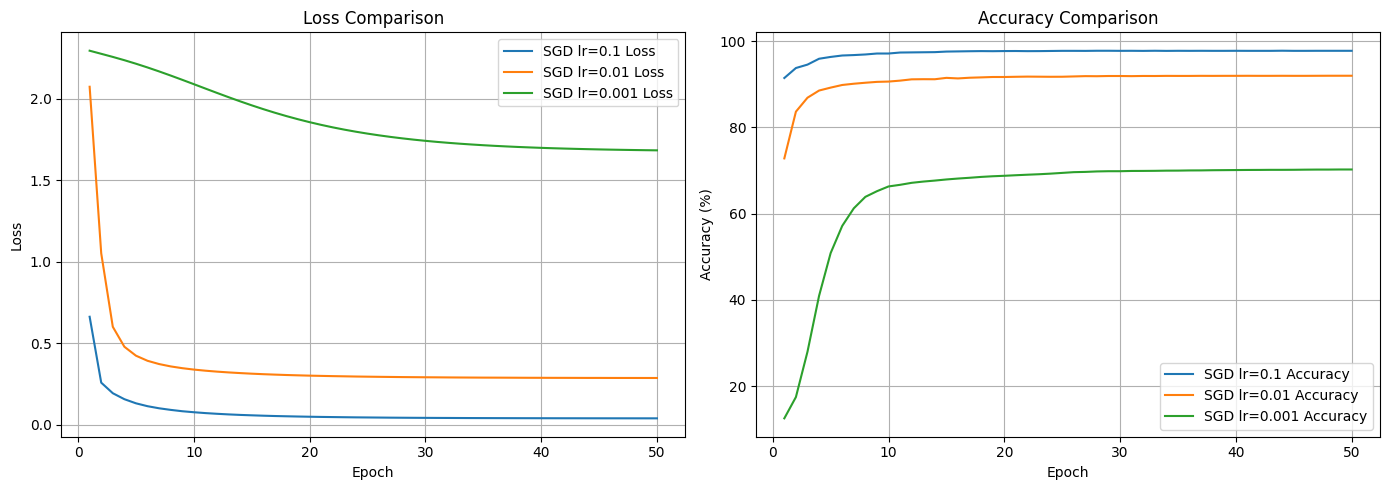

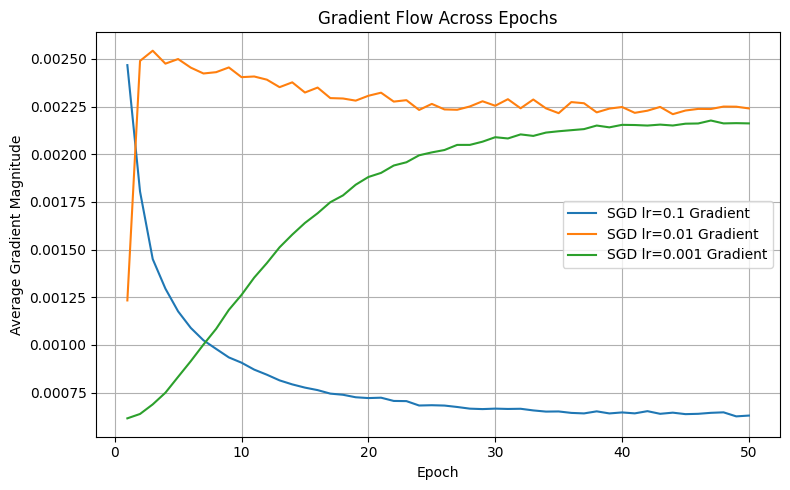

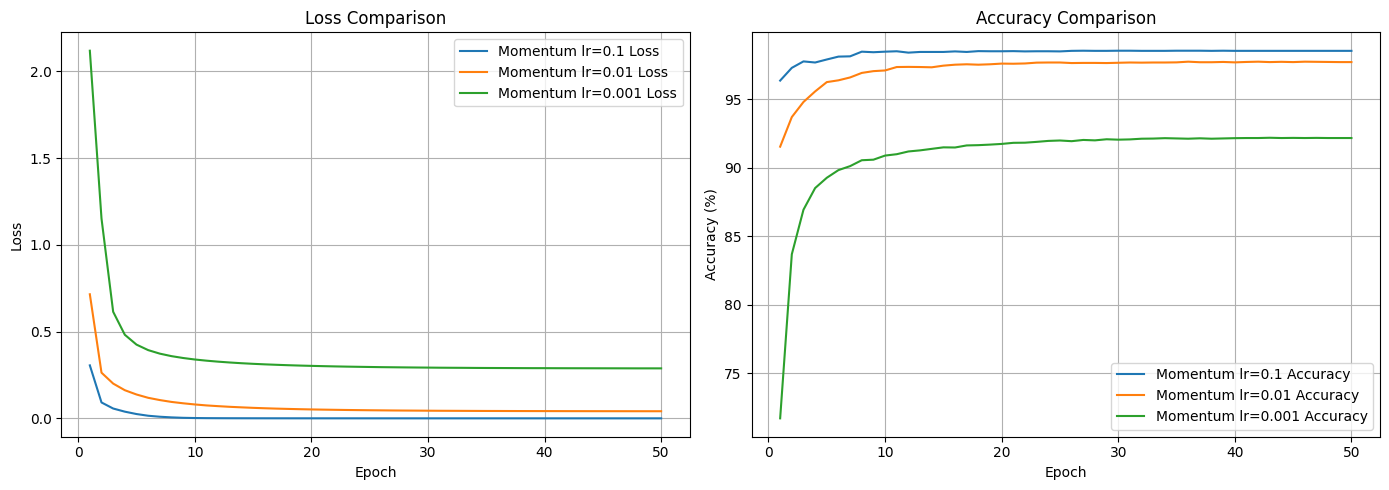

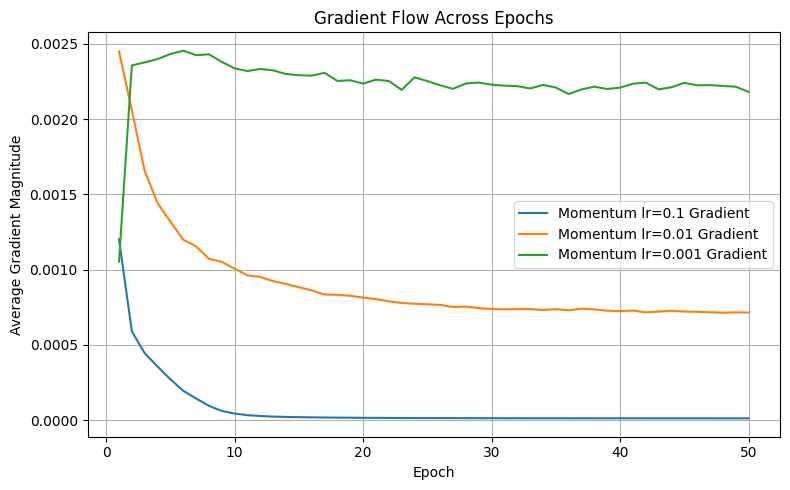

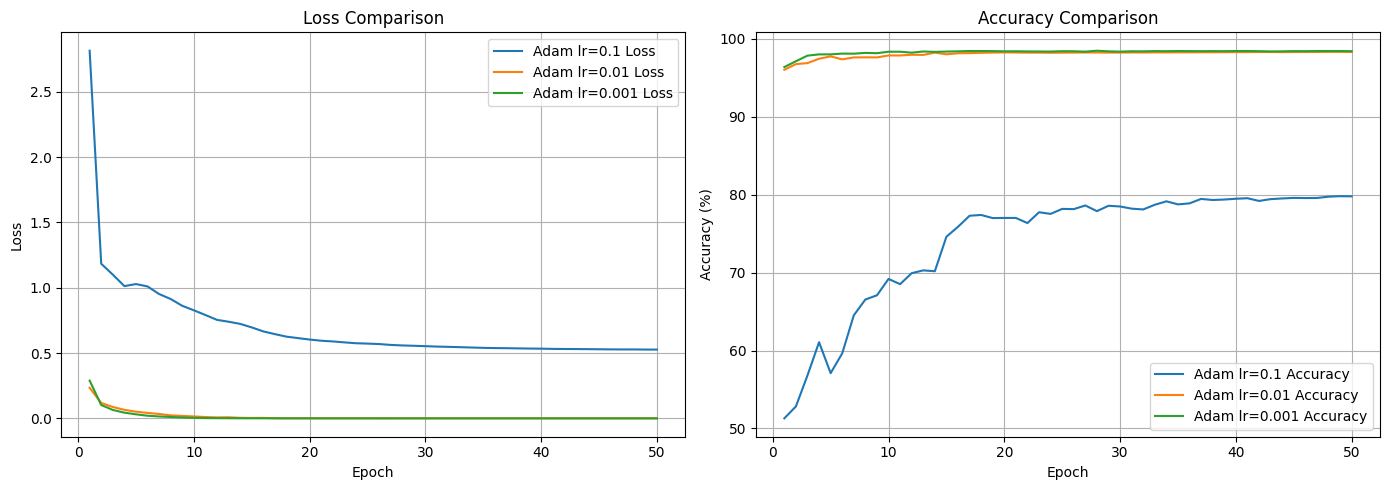

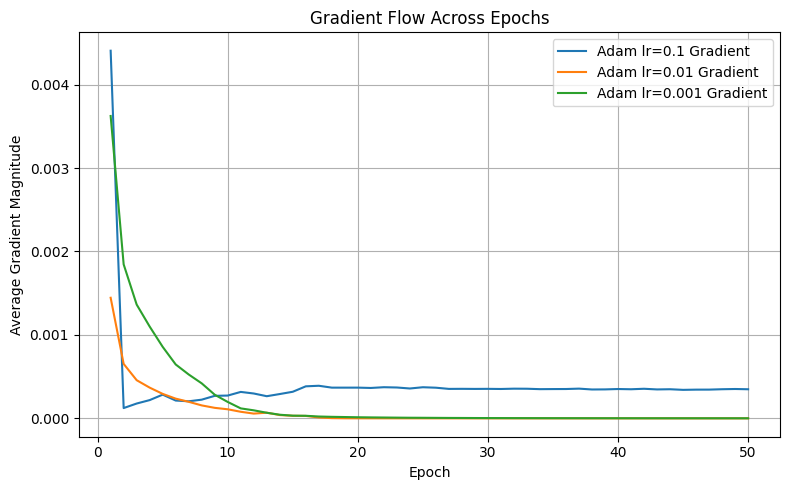

In [4]:
import torch  #PyTorch핵심 패키지
import torch.nn as nn  #신경망 모델의 구조와 층을 정의
import torch.optim as optim  #최적화 관련
import torchvision.datasets as dsets   #표준 이미지 데이터셋
import torchvision.transforms as transforms  #전처리 및 변환하는 기능
from torch.utils.data import DataLoader     #데이터를 미니배치로 나누고 셔플링
import matplotlib.pyplot as plt  #시각화
import numpy as np

# 하이퍼파라미터
input_size = 784      # MNIST-28*28
hidden_size = 512     # 은닉층의 노드 수
num_classes = 10      # 숫자 클래스 (0~9)
num_epochs = 50       # 학습 횟수
batch_size = 128      # 한 번에 처리하는 데이터 개수
learning_rate = 0


# MNIST 데이터셋
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True) #이미지를 PyTorch가 처리 가능한 Tensor로
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# 데이터 로더 정의
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# 모델 정의 (실험 A와 동일하게 설정하였습니다)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 입력층→ 첫번째 은닉층
        self.relu1 = nn.ReLU()                             # 활성화 함수 - 공통적으로 ReLU를 사용하기로 함
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)    # 두번째 은닉층
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size//2, num_classes)  # 출력층

    def forward(self, x):
        out = self.fc1(x) # 첫 은닉층
        out = self.relu1(out) # 첫 활성화 함수 - 활성화 함수는 ReLU로 사용
        out = self.fc2(out)    # 두번째 은닉층
        out = self.relu2(out) # 두번쨰 활성화 함수
        out = self.fc3(out) # 출력층 (여기서는 CE를 쓰기때문에 따로 softmax 적용 안해도 됨)
        return out

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 옵티마이저를 SGD로 하는 경우
def train_with_sgd(lr):
  # 모델 초기화
    model = MLP(input_size, hidden_size, num_classes).to(device)
    criterion = nn.CrossEntropyLoss() # 손실함수는 공통으로 CE를 사용합니다
    optimizer = optim.SGD(model.parameters(), lr=lr) # 옵티마이저는 SGD를 사용합니다 학습률은 함수를 호출할 때 같이 지정해줄 것입니다
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9) # 학습률 스케줄링을 사용합니다. 조건이 지수 감소를 사용하도록 되어 있어 그걸로 설정했습니다

    train_losses, test_accuracies = [], []
    gradients_per_epoch = []

    for epoch in range(num_epochs):
        model.train() # 학습 모드
        total_loss = 0
        epoch_grads=[]  # 에폭의 기울기 평균을 저장하는 리스트를 생성합니다
        for images, labels in train_loader:  # 미니배치
            images, labels = images.to(device), labels.to(device)
            images = images.view(-1, 28 * 28)  # 실험 A와 동일하게 이미지를 1D로 만든다
            outputs = model(images) # 순전파
            loss = criterion(outputs, labels) # 손실값을 계산

            optimizer.zero_grad() # 기울기 초기화
            loss.backward() # 역전파

            # 기울기 저장
            grads = []
            for name, param in model.named_parameters():
              if "weight" in name and param.grad is not None:
                epoch_grads.append(param.grad.detach().abs().mean().item())

            optimizer.step() # 파라미터 업데이트
            total_loss += loss.item() # 손실값 누적하여 저장하기

        scheduler.step()  # 학습률 감소를 적용한다
        # 평균 손실을 계산합니다
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)

        # 실험 A와 동일하게 검증 해주면 됩니다
        model.eval()
        correct = total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                images = images.view(-1, 28 * 28)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = 100 * correct / total
        test_accuracies.append(acc)
        gradients_per_epoch.append(np.mean(epoch_grads))

        print(f"[SGD lr={lr}] Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {acc:.2f}%")

    return train_losses, test_accuracies, gradients_per_epoch

# SGD + Momentum을 옵티마이저로 사용합니다
def train_with_sgd_momentum(lr):
    model = MLP(input_size, hidden_size, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()  # CE를 손실함수로 지정해줍니다(실험 C의 모든 손실함수를 공통으로 지정)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)  #SGD를 사용하며 모멘텀을 추가로 지정해줍니다. 학습률은 함수호출 시에 지정해줍니다
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

    # 아래는 위에 SGD만 사용하는 것과 동일하기 때문에 주석은 생략하도록 하겠습니다
    train_losses, test_accuracies = [], []
    gradients_per_epoch = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        epoch_grads = []

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(-1, 28 * 28)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()

            for name, param in model.named_parameters():
                if "weight" in name and param.grad is not None:
                    epoch_grads.append(param.grad.detach().abs().mean().item())

            optimizer.step()
            total_loss += loss.item()

        scheduler.step()
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        gradients_per_epoch.append(np.mean(epoch_grads))

        model.eval()
        correct = total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                images = images.view(-1, 28 * 28)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = 100 * correct / total
        test_accuracies.append(acc)
        print(f"[SGD+Momentum lr={lr}] Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {acc:.2f}%")

    return train_losses, test_accuracies, gradients_per_epoch

# Adam을 옵티마이저로 사용합니다
def train_with_adam(lr):
    model = MLP(input_size, hidden_size, num_classes).to(device)
    criterion = nn.CrossEntropyLoss() # CE를 손실함수로 지정해줍니다(실험 C의 모든 손실함수를 공통으로 지정)
    optimizer = optim.Adam(model.parameters(), lr=lr)  #Adam으로 지정해줍니다. 학습률은 함수호출 시에 지정해줍니다
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

    # SGD/SGD+Momentum 과 동일하므로 주석은 생략하도록 하겠습니다
    train_losses, test_accuracies = [], []
    gradients_per_epoch = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        epoch_grads = []

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(-1, 28 * 28)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()

            for name, param in model.named_parameters():
                if "weight" in name and param.grad is not None:
                    epoch_grads.append(param.grad.detach().abs().mean().item())

            optimizer.step()
            total_loss += loss.item()

        scheduler.step()
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        gradients_per_epoch.append(np.mean(epoch_grads))

        model.eval()
        correct = total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                images = images.view(-1, 28 * 28)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = 100 * correct / total
        test_accuracies.append(acc)
        print(f"[Adam lr={lr}] Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {acc:.2f}%")

    return train_losses, test_accuracies, gradients_per_epoch

# 손실함수와 정확도를 시각화하기 위해
def compare_loss_accuracy(loss_list, acc_list, labels):

    epochs = range(1, len(loss_list[0]) + 1)

    plt.figure(figsize=(14, 5))

    # 손실 함수 비교
    plt.subplot(1, 2, 1)
    for loss, label in zip(loss_list, labels): # 각 학습률 별로 손실값을 그래프로 출력합니다 (같은 옵티마이저- 다른 학습률의 차이를 보기 위하여 )
        plt.plot(epochs, loss, label=f"{label} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Comparison")
    plt.legend()
    plt.grid(True)

    # 정확도 비교
    plt.subplot(1, 2, 2)
    for acc, label in zip(acc_list, labels):# 각 학습률 별로 정확도를 그래프로 출력합니다 (같은 옵티마이저- 다른 학습률의 차이를 보기 위하여 )
        plt.plot(epochs, acc, label=f"{label} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Comparison")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# 기울기 흐름을 출력하는 함수
def plot_gradient_trend(gradients_list, labels):
    epochs = range(1, len(gradients_list[0]) + 1)
    plt.figure(figsize=(8, 5))
    for grads, label in zip(gradients_list, labels): # 각 옵티마이저와 학습률을 각각 조합하여
        plt.plot(epochs, grads, label=f"{label} Gradient") # 평균 기울기 변화를 그래프로 그립니다
    plt.xlabel("Epoch")
    plt.ylabel("Average Gradient Magnitude")
    plt.title("Gradient Flow Across Epochs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 실험에서 학습률 0.1, 0.01, 0.001을 비교하기 때문에 리스트에 저장해줍니다
lrs = [0.1, 0.01, 0.001]

# 결과 저장용 딕셔너리 입니다
results = {
    "SGD": [],
    "Momentum": [],
    "Adam": []
}

# SGD - 각 학습률에 대한 실험을 진행
for lr in lrs:
    loss, acc, grad = train_with_sgd(lr)
    results["SGD"].append((lr, loss, acc, grad))

# SGD+Momentum - 각 학습률에 대한 실험을 진행
for lr in lrs:
    loss, acc, grad = train_with_sgd_momentum(lr)
    results["Momentum"].append((lr, loss, acc, grad))

# Adam - 각 학습률에 대한 실험을 진행
for lr in lrs:
    loss, acc, grad = train_with_adam(lr)
    results["Adam"].append((lr, loss, acc, grad))

# 시각화 함수 - 옵티마이저 1개 단위로 시각화 함
def visualize_optimizer_results(name, data):
    losses = [entry[1] for entry in data] # - 손실 곡선
    accs = [entry[2] for entry in data] # - 정확도
    grads = [entry[3] for entry in data] # - 기울기
    labels = [f"{name} lr={entry[0]}" for entry in data]

    # Loss & Accuracy
    compare_loss_accuracy(losses, accs, labels)

    # Gradient 흐름
    plot_gradient_trend(grads, labels)

# 시각화 - 각 옵티마이저에 대하여
visualize_optimizer_results("SGD", results["SGD"])
visualize_optimizer_results("Momentum", results["Momentum"])
visualize_optimizer_results("Adam", results["Adam"])





